<AxesSubplot:>

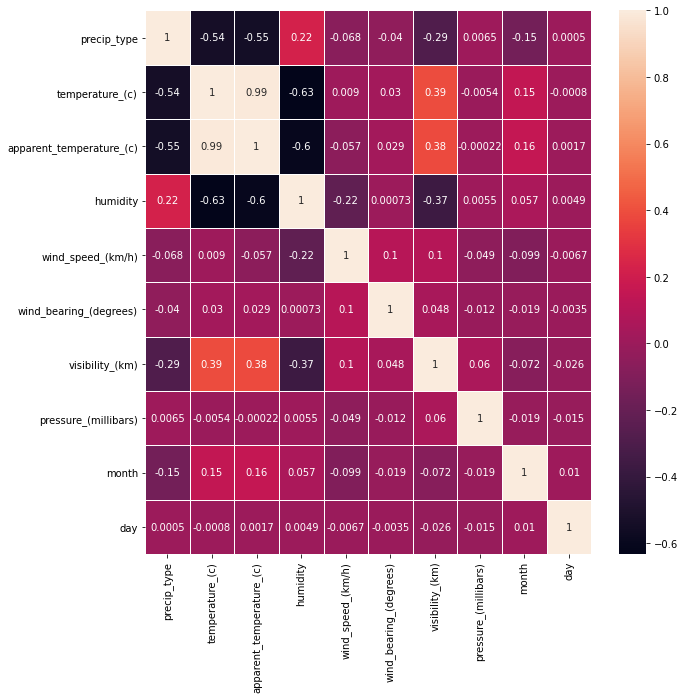

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Ridge

class Weather():

    def __init__(self):
        df = pd.read_csv("/work/data/homework 18/weatherHistory.csv")
        df['Formatted Date'] =  pd.to_datetime(df['Formatted Date'],utc=True)
        df['month'] =  df['Formatted Date'].dt.month.astype("float")
        df['day'] =  df['Formatted Date'].dt.day.astype("float")
        df.set_index('Formatted Date', inplace=True)
        pd.options.display.float_format = '{:,.2f}'.format
        df.columns = df.columns.str.lower().str.replace(" ","_")
        df["precip_type"] = df["precip_type"].fillna(0)
        df["precip_type"] = df["precip_type"].replace('rain',1).replace('snow',2)
        df = df.drop('loud_cover', 1)
        
        self.df = df

    def drop_all_strings(self):
        non_floats = []
        for col in self.df:
            if self.df[col].dtypes != "float64":
                non_floats.append(col)
        self.df = self.df.drop(columns=non_floats) 
    
    def float_change(self):
        for col in self.df:
            try:
                self.df[col] = self.df[col].map('{:,.2f}'.format).astype(float)
            except ValueError:
                pass

    def sns_heatmap(self):
        fig, ax = plt.subplots(figsize=(10,10)) 
        return sns.heatmap(self.df.corr(),annot=True,linewidths=.5, ax=ax)                  
    

model = Weather()

model.df.dtypes
# model.drop_all_strings()
model.float_change()
model.sns_heatmap()
#model.df


In [ ]:
encoded_summary = pd.get_dummies(model.df["summary"])
X = model.df.join(encoded_summary)
y = X["apparent_temperature_(c)"]
X =  X.drop(["apparent_temperature_(c)", "daily_summary", "summary"], axis=1)

df


NameError: name 'df' is not defined

In [ ]:

X =  model.df.drop(["apparent_temperature_(c)", "daily_summary"], axis=1)
y = model.df["apparent_temperature_(c)"]

enc = OrdinalEncoder()
enc.fit([X["summary"].values])
X["summary"] = enc.transform([X["summary"].values])

ValueError: Length of values (1) does not match length of index (96453)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)


scaler = MinMaxScaler()
scaler.fit(X_train)

scaled_X_train  = scaler.transform(X_train)
scaled_X_test  = scaler.transform(X_test)
# scaled_X_train, scaled_X_test  = scaler.transform(X_train), scaler.transform(X_test)



# print("Training parameters", X_train.shape)
# print("Training target", y_train.shape)
# print("\nTesting parameters", X_test.shape)
# print("Testing target", y_test.shape)


# model = LinearRegression()  # creating model
model = DecisionTreeRegressor(random_state=0)
model.fit(scaled_X_train, y_train) # training model
prediction = model.predict(scaled_X_test) # predict new data
print('MAE:', metrics.mean_absolute_error(y_test, prediction))

MAE: 0.02944077924769793


In [ ]:
import optuna

import sklearn.datasets
import sklearn.ensemble
import sklearn.model_selection
import sklearn.svm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
scaler = MinMaxScaler()
scaler.fit(X_train)

scaled_X_train  = scaler.transform(X_train)
scaled_X_test  = scaler.transform(X_test)

def objective(trial):
    max_depth = trial.suggest_int("max_depth", 1, 30)
    model = DecisionTreeRegressor(random_state=0,max_depth=max_depth)
    model.fit(scaled_X_train, y_train) # training model
    prediction = model.predict(scaled_X_test) # predict new data
    error =  metrics.mean_absolute_error(y_test, prediction)
    return error

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=100)
print(study.best_trial)

NameError: name 'train_test_split' is not defined

We have a weather dataset, we are going to try to predict `Apparent temperature` (our target, label, y).

Clean df and prepare it for the modelling. 

Replace nan with mean or 0. What do you think makes more sense for different columns?

Create new column with month number .

In `Precip Type`, replace ['rain','snow'] with 0 and 1. (Using pandas). Make sure it ends up being a numerical column

For now we will not use the remaining `categorical variables` (strings). We will cover this during the next lesson.

Make sure none of columns contain missing values at this point, and everything is numerical. (drop the date column, drop the string columns, make sure `precip type` has become numerical after you replaced values..)

Create X,y datasets. Use them to create a train/test split.

Google `sci-kit linear regreesion`, create that model, train and test it.

Google `sci-kit mean squared error` and use that metric to evaluate model score.

Go back to pre-processing step and try to use `sci-kit min max scaler`, and see whether the score improves

Google `sci-kit decision tree regressor` and use that model instead of linear regression. 

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
X = [['Male'], ['Female'], ['Female'], [ "blue"]]

enc = OrdinalEncoder()
enc.fit(X)
enc.categories_
enc.transform([['Female'], ['Female'], ['Male'], ["blue"], ['Female']])



array([[0.],
       [0.],
       [1.],
       [2.],
       [0.]])

In [ ]:
from sklearn.preprocessing import OneHotEncoder
X = [['Male'], ['Female'], ['Female'], [ "blue"], ["red"]]
print(X)

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X)

new_data = [['Female'], ['Female'], ['Male'], ["blue"], ['Female'], ["red"]]
df = pd.DataFrame(enc.transform(new_data).toarray())
print(enc.categories_)
df["X"] = new_data
df

[['Male'], ['Female'], ['Female'], ['blue'], ['red']]


NameError: name 'pd' is not defined

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7d3ce7c8-a514-49e4-9ba4-a5899ac52ea5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>